1. What is the minimizer and minimum function value of q(x) ?, Is the minimizer in unique ?, Is it local or global
minima ?, Is the function q(x) convex ?, explain each of them.

$f(x) = f(x_1,x_2) = x_1^2 + 4x_1x_2 + 1600x_2^2$



$\nabla^2{f(x)} = \begin{bmatrix} f_{xx} & f_{xy} \\ f_{yx} & f_{yy}\end{bmatrix}$

$\nabla^2{f(x)} = \begin{bmatrix} 2 & 4 \\ 4 & 3200\end{bmatrix}$

We shall find the condition number of the Hessian given by $\kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$,

where $(\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right)$ = maximum eigen value of matrix A

$\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )$ = minimum eigen value of matrix A.   

In [ ]:
import numpy as np
def fx1hessian():
  return np.array([[2,4],[4,3200]])

# condition number
def condition_number(A):
  return np.linalg.cond(A, p=None)  #p = None takes 2 norm with SVD.

print("condition number:",condition_number(np.array([[1,0],[0,1]])))

condition number: 1.0


for finding the minimizer:

$\nabla{f(x)} = 0 ,<2x_1+4x_2, 4x_1+3200x_2> = 0$

$ 2x_1+4x_2  = 0 \\
\ 4x_1+3200x_2 = 0 $

solving for $x_1$ and $x_2$

$3192x_2 = 0 =>x_2 = 0$,$ x_1 = 0$


Hessian $\nabla^2{f(x)} = \begin{bmatrix} 2 & 4 \\ 4 & 3200\end{bmatrix}$ is a positive definite matrix as sub determinants are positive.

So the (0,0) is the minimizer of the function and the minimum value is 0 for the function.


2. In theory provided above, we claimed D is symmetric and positive definite. Provide justification for that claim.
Also based on our discussion on condition number and the derivation of the gradient descent scheme with
scaling, can you identify and write down the matrix Q whose condition number needs to be analyzed in the new
gradient scheme with scaling ?

In [ ]:
import numpy as np
from scipy.linalg import fractional_matrix_power
hessian = fx1hessian()
D = np.array([[1/2, 0],[0, 1/3200]])
alpha= 0.5
Q = fractional_matrix_power(D, alpha)@hessian@fractional_matrix_power(D,alpha)

Q

array([[1.  , 0.05],
       [0.05, 1.  ]])

3. Based on the matrix Q, can you come up with a useful choice for Dk (assuming Dk to be diagonal) ?, Implement
Algorithm - 1 for function f(x), With starting point x0 = (1, 4000) and τ = 10−12, we will now study
the behavior of gradient descent algorithm (without scaling) with backtracking line search, gradient descent
algorithm (with scaling) with backtracking line search, for different choices of ρ. Take α = 1, γ = 0.5. Try ρ ∈
{0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01}.For each ρ, record the final minimizer, final objective function value
and number of iterations to terminate, for the gradient descent algorithm (without scaling) with backtracking
line search and the gradient descent algorithm (with scaling) with backtracking line search. Prepare a plot where
the number of iterations for both the algorithms are plotted against ρ values. Use different colors and a legend
to distinguish the plots corresponding to the different algorithms. Comment on the observations. Comment
about the minimizers and objective function values obtained for different choices of the ρ values for both the
algorithms. Plot the level sets of the function f(x) and also plot the trajectory of the optimization on the
same plot for both with scaling and without scaling gradient descent algorithm and report your observations.
(Without scaling is nothing but the Algorithm 01 from Lab 02.)

In [ ]:
import numpy as np
from numpy.linalg import norm
from numpy import exp, cos, sin
from math import sqrt, pi
from numpy import ma
def fx1(xk):
  x1 = xk[0]
  x2 = xk[1]
  return x1**2 + 4*x1*x2 + 1600*x2**2

def gradient_fx1(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array([2*x1+4*x2, 4*x1+3200*x2])

def hessian_fx1(xk):
  return np.array([[2,4],[4,3200]])

def dk_fx1():
  return np.array([[1/2, 0],[0, 1/3200]])


def get_alpha(xk, alpha0, rho, gamma):
  alpha = alpha0
  pk = -1*gradient_fx1(xk)
  while fx1(xk + alpha*pk) > (fx1(xk) + gamma*alpha*gradient_fx1(xk)@pk):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0):
  xk = np.copy(x0)
  count = 0
  pk = -1*gradient_fx1(xk)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    alpha =  get_alpha(xk, alpha0, rho, gamma)
    xk = xk + alpha*pk
    pk = -1*gradient_fx1(xk)
    count += 1
    xks.append(xk)
  return count, xk, fx1(xk),xks

def get_alpha_with_scaling(xk, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -gradient_fx1(xk)
  while fx1(xk + alpha*Dk@pk) > (fx1(xk) + gamma*alpha*gradient_fx1(xk)@Dk@pk):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_backtracking_with_scaling(x0, tau, rho, gamma, alpha0,Dk):
  xk = np.copy(x0)
  count = 0
  pk = -1*gradient_fx1(xk)
  alpha = alpha0
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    alpha =  get_alpha_with_scaling(xk, alpha0, rho, gamma, Dk)
    xk = xk + alpha*Dk@pk
    pk = -1*gradient_fx1(xk)
    xks.append(xk)
    count += 1
  return count, xk, fx1(xk), xks

0.9,3583,[-4.86897154e-13  5.56578299e-16],2.364805000795663e-25 without scaling
0.9,15,[-4.39447021e-15  2.44139938e-16],1.103868009193147e-28 with scaling


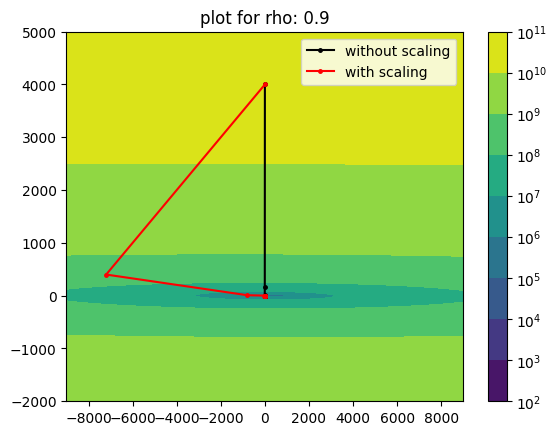

0.8,1331,[-4.79006925e-13  5.77859847e-16],2.2887471356620955e-25 without scaling
0.8,16,[-9.76561279e-16  4.88265991e-18],9.727436542890936e-31 with scaling


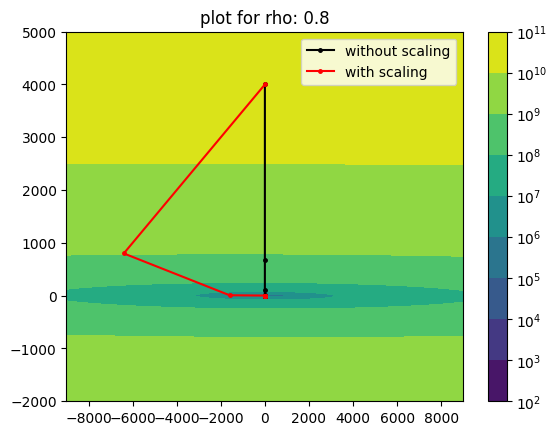

0.75,538,[-4.12345553e-13  4.98693146e-16],1.6960423093180596e-25 without scaling
0.75,16,[-1.22070198e-15  4.57744598e-18],1.5012873546806794e-30 with scaling


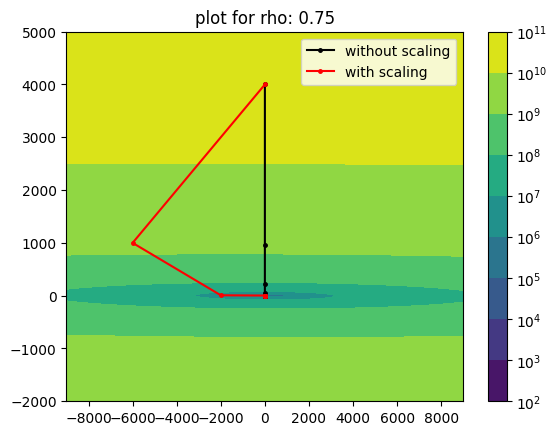

0.6,5615,[-4.86809153e-13  6.52330287e-16],2.363937657228955e-25 without scaling
0.6,16,[-1.95312408e-15  3.66180420e-18],3.8075399534401486e-30 with scaling


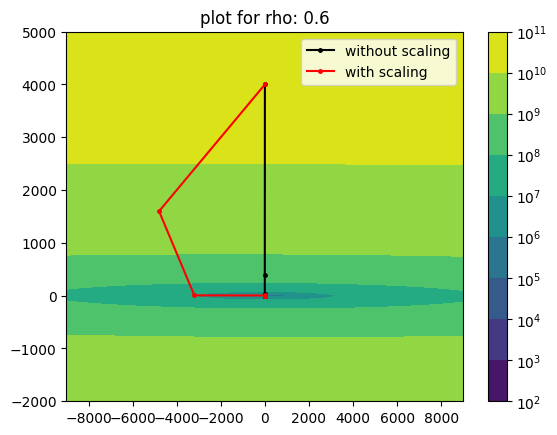

0.5,16981,[-4.77038750e-13  6.86254384e-16],2.2701000104598094e-25 without scaling
0.5,17,[-1.22375412e-15  3.05156660e-18],1.4975359710576571e-30 with scaling


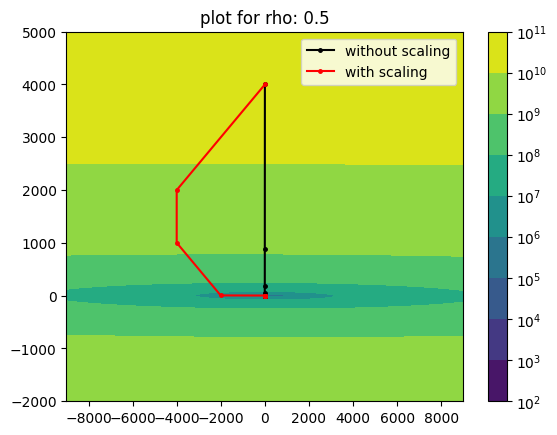

0.4,5961,[-4.92016016e-13  6.63916164e-16],2.414783857100508e-25 without scaling
0.4,17,[-1.75976489e-15  2.92941254e-18],3.0898825002947456e-30 with scaling


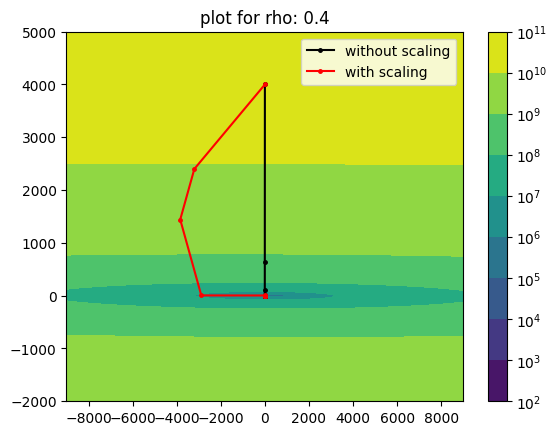

0.25,15287,[-4.78952422e-13  5.09080727e-16],2.2883478137396547e-25 without scaling
0.25,19,[-1.54752679e-15  2.57539411e-18],2.3895094434340225e-30 with scaling


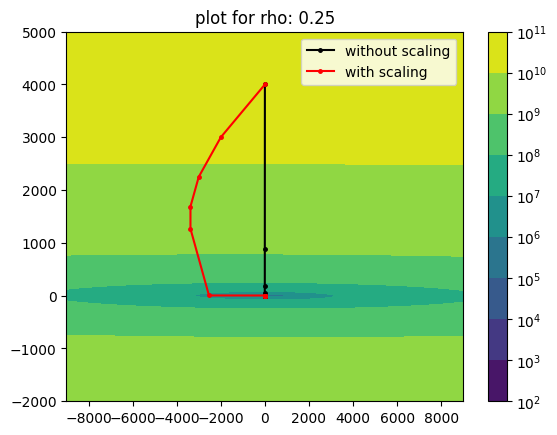

0.1,37849,[-4.44250589e-13  6.83670379e-16],1.96891550544363e-25 without scaling
0.1,25,[-1.70489582e-15  2.36523646e-18],2.8994907865533534e-30 with scaling


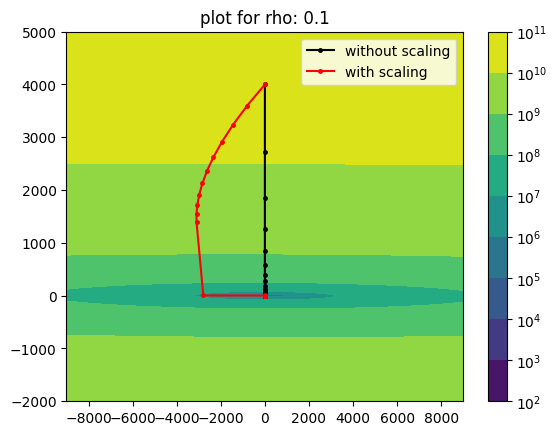

0.01,13538,[-4.87654555e-13  5.39105672e-16],2.3722039118811697e-25 without scaling
0.01,115,[-1.78952383e-15  2.25730189e-18],3.194390227877738e-30 with scaling


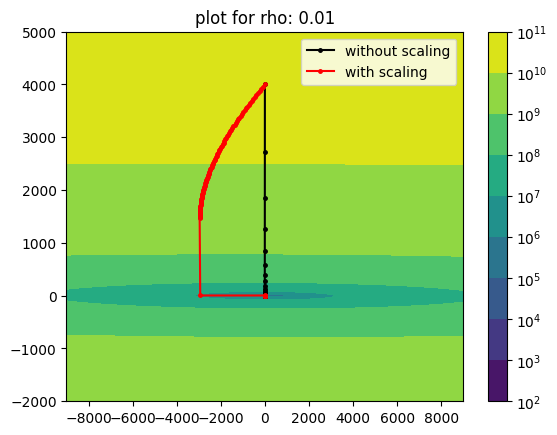

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
x0 = np.array([1,4000])
tau = 1e-12
alpha0 = 1
gamma = 0.5
rhos = [0.9, 0.8,0.75,0.6,0.5,0.4,0.25,0.1,0.01]

from numpy.linalg import norm

iterations_backtracking_without_scaling = []
iterations_backtracking_with_scaling = []
minimizer_backtracking_without_scaling = []
minimizer_backtracking_with_scaling = []
minimum_backtracking_with_scaling = []
minimum_backtracking_without_scaling = []


for rho in rhos:
  Dk = dk_fx1()
  count1, final_xk1, final_val1, xks1 = gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0)
  count2, final_xk2, final_val2, xks2 = gradient_descent_with_backtracking_with_scaling(x0, tau, rho, gamma, alpha0, Dk)
  print(f"{rho},{count1},{final_xk1},{final_val1} without scaling")
  print(f"{rho},{count2},{final_xk2},{final_val2} with scaling")


  x = np.linspace(-9000, 9000, 5000)
  y = np.linspace(-2000, 5000, 5000)
  X, Y = np.meshgrid(x, y)
  Z = fx1((X,Y))
  p = plt.contourf(X,Y,Z,locator = ticker.LogLocator())
  plt.title(f"plot for rho: {rho}")
  cbar = plt.colorbar(p)
  xcordinates1 = [xk1[0] for xk1 in xks1]
  ycordinates1 = [xk1[1] for xk1 in xks1]
  plt.plot(xcordinates1, ycordinates1, color='black', marker = '.', markersize = 5, label = 'without scaling')
  xcordinates2 = [xk1[0] for xk1 in xks2]
  ycordinates2 = [xk1[1] for xk1 in xks2]
  plt.plot(xcordinates2, ycordinates2, color='red',  marker = '.', markersize = 5, label = 'with scaling')
  plt.legend()
  plt.show()
  iterations_backtracking_without_scaling.append(count1)
  iterations_backtracking_with_scaling.append(count2)
  minimizer_backtracking_without_scaling.append(final_xk1)
  minimizer_backtracking_with_scaling.append(final_xk2)
  minimum_backtracking_without_scaling.append(final_val1)
  minimum_backtracking_with_scaling.append(final_val2)

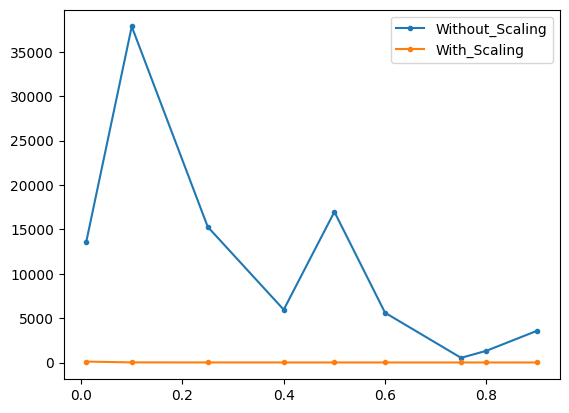

In [ ]:
plt.plot(rhos, iterations_backtracking_without_scaling, marker = '.', label = "Without_Scaling")
plt.plot(rhos, iterations_backtracking_with_scaling, marker = '.', label = "With_Scaling")
plt.legend()
plt.show()


Scaling significantly reduces iterations by addressing ill-conditioned Hessians. Scaling with Dk nearly aligns it with the identity matrix. Decreasing rho further reduces iterations. Trajectories in scaled backtracking aren't straight but reach the minimizer with fewer iterations. Without scaling, initial jumps are large, but convergence slows near the minimizer. Dk helps unstretch the function along the x-axis, aiding convergence.

4. Based on our discussion on condition number and the derivation of the gradient descent scheme with scaling,
can you identify and write down the matrix Q whose condition number needs to be analyzed in the new gradient
descent scheme with scaling with Dk = (∇2f(x))−1 ?, For the problem minx g(x) = 512(x2 − x21
)2 + (4 − x1)2,
Implement Algorithm - 1 with starting point x0 = (8, 8) and a stopping tolerance τ = 10−5 , find the
number of iterations taken by the gradient descent algorithm (without scaling) with backtracking line search,
gradient descent algorithm (with scaling) with backtracking line search. For backtracking line search, use α0 =
1, ρ = 0.5, γ = 0.5. Note the minimizer and minimum objective function value in each case. Comment on
your observations. Also note the condition number of the Hessian matrix involved in the gradient descent
algorithm (without scaling) with backtracking line search and condition number of the matrix Q involved in
the gradient descent algorithm (with scaling) with backtracking line search in each iteration. Prepare a plot
depicting the behavior of condition numbers in both algorithms against iterations. Use different colors and
legend to distinguish the methods. Comment on your observations.

In [ ]:
def gx1(xk):
  return  (512*(xk[1]-xk[0]**2)**2) + (4-xk[0])**2

def gradient_gx1(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array( [-2048*(x2-x1**2)*x1 - 8 + 2*x1, 1024*(x2-x1**2)] )  #calculated in copy

def hessian_gx1(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array([[6144*x1**2-2048*x2+2,-2048*x1],[-2048*x1,1024]]) #calculated in copy

def dk_gx1(xk):
  return np.linalg.inv(hessian_gx1(xk))

def get_alpha(xk, alpha0, rho, gamma):
  alpha = alpha0
  pk = -1*gradient_gx1(xk)
  while gx1(xk + alpha*pk) > (gx1(xk) + gamma*alpha*gradient_gx1(xk)@pk):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0):
  xk = np.copy(x0)
  count = 0
  pk = -1*gradient_gx1(xk)
  xks = []
  xks.append(xk)
  cond_hs = []

  while norm(pk)>tau:
    hessian = hessian_gx1(xk)
    cond_hs.append(condition_number(hessian))

    alpha =  get_alpha(xk, alpha0, rho, gamma)
    xk = xk + alpha*pk
    pk = -1*gradient_gx1(xk)
    count += 1
    xks.append(xk)
  return count, xk, gx1(xk),xks, cond_hs

def get_alpha_with_scaling(xk, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -gradient_gx1(xk)
  while gx1(xk + alpha*Dk@pk) > (gx1(xk) + gamma*alpha*gradient_gx1(xk)@Dk@pk):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_backtracking_with_scaling(x0, tau, rho, gamma, alpha0,Dk):
  xk = np.copy(x0)
  count = 0
  pk = -1*gradient_gx1(xk)
  alpha = alpha0
  xks = []
  xks.append(xk)
  Dk = dk_gx1(xk)
  cond_q = []
  cond_hs = []

  while norm(pk)>tau:

    hessian = hessian_gx1(xk)
    cond_hs.append(condition_number(hessian))
    Dk = dk_gx1(xk)
    Q = fractional_matrix_power(Dk, 0.5)@hessian@fractional_matrix_power(Dk, 0.5)
    condition_no = condition_number(Q)
    cond_q.append(condition_no)

    alpha =  get_alpha_with_scaling(xk, alpha0, rho, gamma, Dk)
    xk = xk + alpha*Dk@pk
    pk = -1*gradient_gx1(xk)
    Dk = dk_gx1(xk)
    xks.append(xk)
    count += 1
  return count, xk, gx1(xk), xks, cond_hs, cond_q

<ipython-input-48-499ee5532a62>:2: RuntimeWarning: overflow encountered in long_scalars
  return  (512*(xk[1]-xk[0]**2)**2) + (4-xk[0])**2


0.5,902403,[ 3.99995978 15.99967825],1.6175204028483831e-09 without scaling
0.5,48,[ 4. 16.],2.356430075812841e-25, with scaling


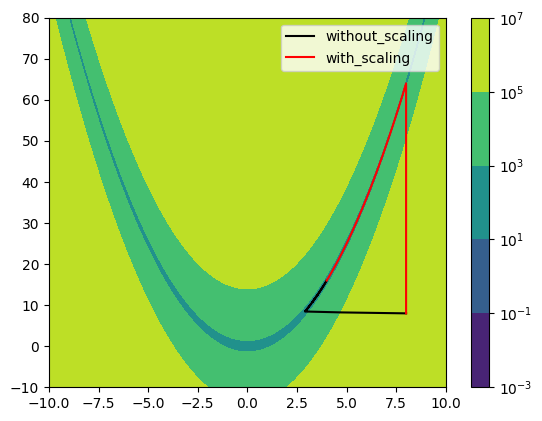

In [ ]:
x0 = np.array([8,8]) # initial values
tau = 1e-5
alpha0 = 1
gamma = 0.5
rhos = [0.5]


iterations_backtracking_without_scaling = []
iterations_backtracking_with_scaling = []
minimizer_backtracking_without_scaling = []
minimizer_backtracking_with_scaling = []
minimum_backtracking_with_scaling = []
minimum_backtracking_without_scaling = []

for rho in rhos:
  Dk = dk_gx1(x0)
  count1, final_xk1, final_val1, xks1, cond_hs = gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0)
  count2, final_xk2, final_val2, xks2, cond_hs_with_scale, cond_q_with_scale = gradient_descent_with_backtracking_with_scaling(x0, tau, rho, gamma, alpha0, Dk)
  print(f"{rho},{count1},{final_xk1},{final_val1} without scaling")
  print(f"{rho},{count2},{final_xk2},{final_val2}, with scaling")



  x = np.linspace(-10, 10,2000)
  y = np.linspace(-10, 80,2000)
  X, Y = np.meshgrid(x, y)
  Z = gx1((X,Y))
  p = plt.contourf(X,Y,Z,locator = ticker.LogLocator())
  cbar = plt.colorbar(p)
  xcordinates1 = [xk1[0] for xk1 in xks1]
  ycordinates1 = [xk1[1] for xk1 in xks1]
  plt.plot(xcordinates1, ycordinates1, color='black', label = 'without_scaling')
  xcordinates2 = [xk1[0] for xk1 in xks2]
  ycordinates2 = [xk1[1] for xk1 in xks2]
  plt.plot(xcordinates2, ycordinates2, color='red', label = 'with_scaling')
  plt.legend()
  plt.show()

  iterations_backtracking_without_scaling.append(count1)
  iterations_backtracking_with_scaling.append(count2)
  minimizer_backtracking_without_scaling.append(final_xk1)
  minimizer_backtracking_with_scaling.append(final_xk2)
  minimum_backtracking_without_scaling.append(final_val1)
  minimum_backtracking_with_scaling.append(final_val2)

The minimizer and minimum are (4,16) and 0 respectively in both cases. Remarkably, the scaled version took a significantly longer time to run with approximately 900,000 iterations, whereas the unscaled one only required 48 runs. This highlights the critical role of matrix conditioning. Additionally, the trajectory of the scaled version meanders before reaching the minimum, albeit in just 48 steps. This underscores the trade-off between computational efficiency and path optimization, demonstrating how proper scaling can streamline convergence despite the seemingly circuitous route to the minimum.

Text(0.5, 1.0, 'Condition number of without_Scaling')

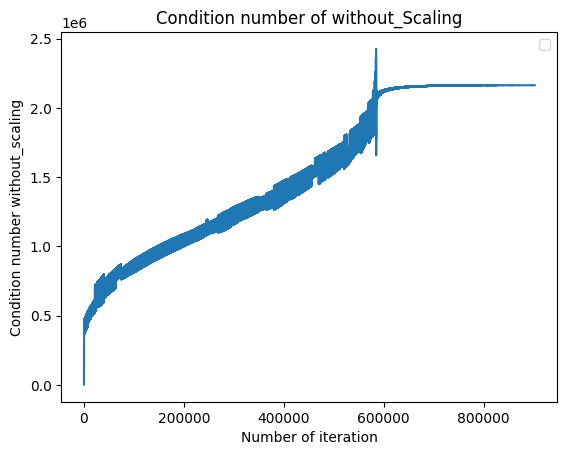

In [ ]:
plt.plot([i+1 for i in range(count1)], cond_hs)
plt.xlabel('Number of iteration')
plt.ylabel('Condition number without_scaling')
plt.legend()
plt.title("Condition number of without_Scaling")

Text(0.5, 1.0, 'Condition number of With Scaling')

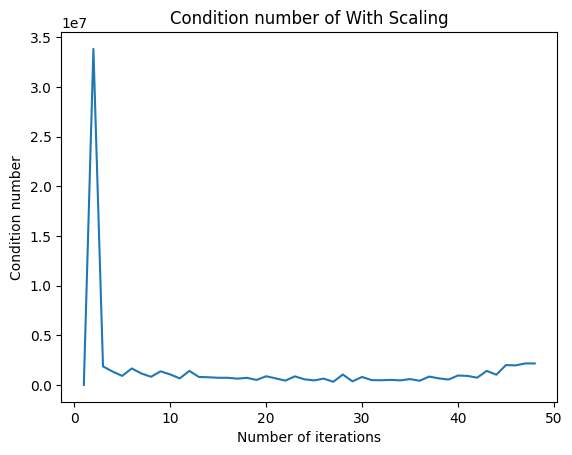

In [ ]:
plt.plot([i+1 for i in range(count2)], cond_hs_with_scale)
plt.xlabel('Number of iterations')
plt.ylabel("Condition number")
plt.title("Condition number of With Scaling")

Text(0.5, 1.0, 'Condition number of Q With Scaling')

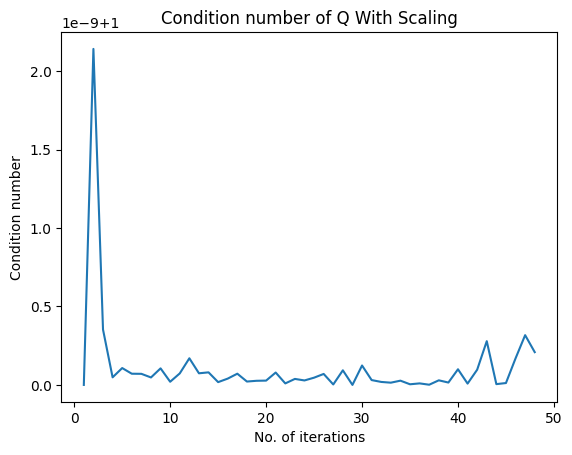

In [ ]:
plt.plot([i+1 for i in range(count2)], cond_q_with_scale)
plt.xlabel('No. of iterations')
plt.ylabel('Condition number')
plt.title('Condition number of Q With Scaling')

5. Now can you solve the Part 04 of Exercise 03 from the last lab i.e. Lab 02 ?, Is your devised method aligns
with this Algorithm - 1 ?